In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

127

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

property_type              society     sector      price  price_per_sqft  \
0          flat  dlf the ultima4.0 ?  sector 81  2.3 Crore         10994.0   

                             areaWithType bedRoom  bathroom balcony  \
0  Super Built up area 2092(194.35 sq.m.)     3.0       4.0     NaN   

  additionalRoom  floorNum facing    agePossession  \
0   servant room       6.0   East  0 to 1 Year Old   

                                                                                                                                                                                                                           nearbyLocations  \
0  ['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']   

                                                                                                                                                                                                                                              furnishDetails  \
0  ['8 Fan', '1 Fridge', '1 Exhaust Fan', '7 Geyser', '1 Stove', '10 Light', '5 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            features  \
0  ['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']   

   area  
0   NaN

In [6]:
df.sample(5)[['price','area','areaWithType']]

price  area  \
3242   2.7 Crore   NaN   
3811     2 Crore   NaN   
983       88 Lac   NaN   
1517  2.37 Crore   NaN   
2732   4.1 Crore   NaN   

                                                                                                                areaWithType  
3242                                                                                        Carpet area: 1650 (153.29 sq.m.)  
3811                                           Super Built up area 2408(223.71 sq.m.)Carpet area: 1685 sq.ft. (156.54 sq.m.)  
983        Super Built up area 1385(128.67 sq.m.)Built Up area: 940 sq.ft. (87.33 sq.m.)Carpet area: 845 sq.ft. (78.5 sq.m.)  
1517                                               Built Up area: 2060 (191.38 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.)  
2732  Super Built up area 3880(360.46 sq.m.)Built Up area: 3500 sq.ft. (325.16 sq.m.)Carpet area: 3000 sq.ft. (278.71 sq.m.)

In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [18]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [19]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

price property_type    area  \
3080         4.3         house  1494.0   
1994      30 Lac          flat     NaN   
1947  1.13 Crore          flat     NaN   
2734   3.7 Crore          flat     NaN   
566    1.1 Crore          flat     NaN   

                                                                                                               areaWithType  \
3080           Plot area 166(138.8 sq.m.)Built Up area: 165 sq.yards (137.96 sq.m.)Carpet area: 164 sq.yards (137.12 sq.m.)   
1994                                              Super Built up area 567(52.68 sq.m.)Carpet area: 467 sq.ft. (43.39 sq.m.)   
1947    Super Built up area 1245(115.66 sq.m.)Built Up area: 1130 sq.ft. (104.98 sq.m.)Carpet area: 930 sq.ft. (86.4 sq.m.)   
2734                                                                                        Carpet area: 2100 (195.1 sq.m.)   
566   Super Built up area 1762(163.7 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.)   

     super_built_up_area built_up_area carpet_area  
3080                None          None        None  
1994                None          None        None  
1947                None          None        None  
2734                None          None        None  
566                 None          None        None

In [20]:
df.duplicated().sum()

127

In [21]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(0, 7)

In [22]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)


price property_type    area  \
4    2.9         house  2700.0   
10  0.29         house   891.0   
15   3.5         house  1935.0   
16   1.4         house   585.0   
20   1.5         house  1980.0   

                                                                                                    areaWithType  \
4                                                                                   Plot area 2700(250.84 sq.m.)   
10                                                                                    Plot area 891(82.78 sq.m.)   
15  Plot area 215(179.77 sq.m.)Built Up area: 214 sq.yards (178.93 sq.m.)Carpet area: 180 sq.yards (150.5 sq.m.)   
16       Plot area 65(54.35 sq.m.)Built Up area: 62 sq.yards (51.84 sq.m.)Carpet area: 60 sq.yards (50.17 sq.m.)   
20                                                                                   Plot area 220(183.95 sq.m.)   

   super_built_up_area built_up_area carpet_area  
4                 None          None        None  
10                None          None        None  
15                None          None        None  
16                None          None        None  
20                None          None        None

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    84
price_per_sqft           35
areaWithType              0
bedRoom                  66
bathroom                 66
balcony                1017
additionalRoom         1271
floorNum                 85
facing                 1181
agePossession            67
nearbyLocations         216
furnishDetails         1058
features                711
area                   3039
super_built_up_area    3886
built_up_area          3886
carpet_area            3886
dtype: int64

In [24]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


In [25]:
all_nan_df.head()


price property_type    area                            areaWithType  \
0   2.3 Crore          flat     NaN  Super Built up area 2092(194.35 sq.m.)   
1  1.47 Crore          flat     NaN        Carpet area: 1200 (111.48 sq.m.)   
2      72 Lac          flat     NaN                        Carpet area: 706   
3  1.75 Crore          flat     NaN        Carpet area: 2324 (215.91 sq.m.)   
4         2.9         house  2700.0            Plot area 2700(250.84 sq.m.)   

  super_built_up_area built_up_area carpet_area  
0                None          None        None  
1                None          None        None  
2                None          None        None  
3                None          None        None  
4                None          None        None

In [26]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index


In [28]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [29]:
all_nan_df

price property_type      area  \
0            2.3 Crore          flat       NaN   
1           1.47 Crore          flat       NaN   
2               72 Lac          flat       NaN   
3           1.75 Crore          flat       NaN   
4                  2.9         house    2700.0   
5             41.5 Lac          flat       NaN   
6           1.05 Crore          flat       NaN   
7               75 Lac          flat       NaN   
8              1 Crore          flat       NaN   
9           1.82 Crore          flat       NaN   
10                0.29         house     891.0   
11          2.55 Crore          flat       NaN   
12          1.43 Crore          flat       NaN   
13              95 Lac          flat       NaN   
14             7 Crore          flat       NaN   
15                 3.5         house    1935.0   
16                 1.4         house     585.0   
17              73 Lac          flat       NaN   
18           3.7 Crore          flat       NaN   
19                 NaN         house       NaN   
20                 1.5         house    1980.0   
21          1.35 Crore          flat       NaN   
22                3.09         house    4426.0   
23                3.55         house    1449.0   
24          1.72 Crore          flat       NaN   
25          1.55 Crore          flat       NaN   
26             1 Crore          flat       NaN   
27              95 Lac          flat       NaN   
28              36 Lac          flat       NaN   
29           1.1 Crore          flat       NaN   
30           1.4 Crore          flat       NaN   
31           2.5 Crore          flat       NaN   
32           1.4 Crore          flat       NaN   
33                0.85         house    1120.0   
34          1.27 Crore          flat       NaN   
35          1.59 Crore          flat       NaN   
36              65 Lac          flat       NaN   
37              70 Lac          flat       NaN   
38          8.44 Crore          flat       NaN   
39          1.33 Crore          flat       NaN   
40                4.25         house    1836.0   
41                0.55         house     820.0   
42          2.25 Crore          flat       NaN   
43          2.79 Crore          flat       NaN   
44          3.25 Crore          flat       NaN   
45          1.64 Crore          flat       NaN   
46           1.9 Crore          flat       NaN   
47            72.5 Lac          flat       NaN   
48              90 Lac          flat       NaN   
49           1.7 Crore          flat       NaN   
50              86 Lac          flat       NaN   
51                3.25         house     981.0   
52          3.55 Crore          flat       NaN   
53                7.85         house    2700.0   
54              88 Lac          flat       NaN   
55           1.5 Crore          flat       NaN   
56                 1.7         house    1800.0   
57          1.05 Crore          flat       NaN   
58          3.75 Crore          flat       NaN   
59          1.25 Crore          flat       NaN   
60          1.05 Crore          flat       NaN   
61           2.3 Crore          flat       NaN   
62          3.25 Crore          flat       NaN   
63            88.5 Lac          flat       NaN   
64          1.54 Crore          flat       NaN   
65             2 Crore          flat       NaN   
66              30 Lac          flat       NaN   
67           1.2 Crore          flat       NaN   
68          1.42 Crore          flat       NaN   
69           1.2 Crore          flat       NaN   
70                11.0         house    3096.0   
71              90 Lac          flat       NaN   
72                 1.7         house     945.0   
73          2.22 Crore          flat       NaN   
74          3.75 Crore          flat       NaN   
75              95 Lac          flat       NaN   
76                 1.6         house     558.0   
77              54 Lac          flat       NaN   
78           3.4 Crore          flat       NaN   
79             1 

In [30]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [31]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)


In [32]:
all_nan_df

price property_type      area  \
0            2.3 Crore          flat       NaN   
1           1.47 Crore          flat       NaN   
2               72 Lac          flat       NaN   
3           1.75 Crore          flat       NaN   
4                  2.9         house    2700.0   
5             41.5 Lac          flat       NaN   
6           1.05 Crore          flat       NaN   
7               75 Lac          flat       NaN   
8              1 Crore          flat       NaN   
9           1.82 Crore          flat       NaN   
10                0.29         house     891.0   
11          2.55 Crore          flat       NaN   
12          1.43 Crore          flat       NaN   
13              95 Lac          flat       NaN   
14             7 Crore          flat       NaN   
15                 3.5         house    1935.0   
16                 1.4         house     585.0   
17              73 Lac          flat       NaN   
18           3.7 Crore          flat       NaN   
19                 NaN         house       NaN   
20                 1.5         house    1980.0   
21          1.35 Crore          flat       NaN   
22                3.09         house    4426.0   
23                3.55         house    1449.0   
24          1.72 Crore          flat       NaN   
25          1.55 Crore          flat       NaN   
26             1 Crore          flat       NaN   
27              95 Lac          flat       NaN   
28              36 Lac          flat       NaN   
29           1.1 Crore          flat       NaN   
30           1.4 Crore          flat       NaN   
31           2.5 Crore          flat       NaN   
32           1.4 Crore          flat       NaN   
33                0.85         house    1120.0   
34          1.27 Crore          flat       NaN   
35          1.59 Crore          flat       NaN   
36              65 Lac          flat       NaN   
37              70 Lac          flat       NaN   
38          8.44 Crore          flat       NaN   
39          1.33 Crore          flat       NaN   
40                4.25         house    1836.0   
41                0.55         house     820.0   
42          2.25 Crore          flat       NaN   
43          2.79 Crore          flat       NaN   
44          3.25 Crore          flat       NaN   
45          1.64 Crore          flat       NaN   
46           1.9 Crore          flat       NaN   
47            72.5 Lac          flat       NaN   
48              90 Lac          flat       NaN   
49           1.7 Crore          flat       NaN   
50              86 Lac          flat       NaN   
51                3.25         house     981.0   
52          3.55 Crore          flat       NaN   
53                7.85         house    2700.0   
54              88 Lac          flat       NaN   
55           1.5 Crore          flat       NaN   
56                 1.7         house    1800.0   
57          1.05 Crore          flat       NaN   
58          3.75 Crore          flat       NaN   
59          1.25 Crore          flat       NaN   
60          1.05 Crore          flat       NaN   
61           2.3 Crore          flat       NaN   
62          3.25 Crore          flat       NaN   
63            88.5 Lac          flat       NaN   
64          1.54 Crore          flat       NaN   
65             2 Crore          flat       NaN   
66              30 Lac          flat       NaN   
67           1.2 Crore          flat       NaN   
68          1.42 Crore          flat       NaN   
69           1.2 Crore          flat       NaN   
70                11.0         house    3096.0   
71              90 Lac          flat       NaN   
72                 1.7         house     945.0   
73          2.22 Crore          flat       NaN   
74          3.75 Crore          flat       NaN   
75              95 Lac          flat       NaN   
76                 1.6         house     558.0   
77              54 Lac          flat       NaN   
78           3.4 Crore          flat       NaN   
79             1 

In [33]:
# update the original dataframe
df.update(all_nan_df)

In [34]:
df.isnull().sum()


property_type             0
society                   1
sector                    0
price                    84
price_per_sqft           35
areaWithType              0
bedRoom                  66
bathroom                 66
balcony                1017
additionalRoom         1271
floorNum                 85
facing                 1181
agePossession            67
nearbyLocations         216
furnishDetails         1058
features                711
area                   3039
super_built_up_area    3886
built_up_area          3203
carpet_area            3886
dtype: int64

In [35]:
df.head()


property_type                society      sector       price  \
0          flat    dlf the ultima4.0 ?   sector 81   2.3 Crore   
1          flat    smart world orchard   sector 61  1.47 Crore   
2          flat  pivotal riddhi siddhi   sector 99      72 Lac   
3          flat     godrej summit3.7 ?  sector 104  1.75 Crore   
4         house            independent   sector 12         2.9   

   price_per_sqft                            areaWithType     bedRoom  \
0         10994.0  Super Built up area 2092(194.35 sq.m.)         3.0   
1         12250.0        Carpet area: 1200 (111.48 sq.m.)         2.0   
2           947.0                        Carpet area: 706         2.0   
3          7530.0        Carpet area: 2324 (215.91 sq.m.)         4.0   
4         10740.0            Plot area 2700(250.84 sq.m.)  7 Bedrooms   

   bathroom balcony additionalRoom  floorNum      facing    agePossession  \
0       4.0     NaN   servant room       6.0        East  0 to 1 Year Old   
1       2.0     2.0     study room       2.0         NaN           Dec-23   
2       2.0     2.0     store room      12.0         NaN  1 to 5 Year Old   
3       5.0     NaN   servant room       1.0         NaN  0 to 1 Year Old   
4       7.0       3  not available       2.0  South-West     10+ Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            nearbyLocations  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']   
1                                                                                

In [36]:
df['additionalRoom'].value_counts()

servant room                                     706
not available                                    395
study room                                       250
others                                           225
pooja room                                       165
study room,servant room                           99
store room                                        99
pooja room,servant room                           82
pooja room,study room,servant room,store room     72
servant room,others                               60
pooja room,study room,servant room                56
pooja room,study room,servant room,others         54
servant room,pooja room                           38
servant room,store room                           33
study room,others                                 29
pooja room,study room                             22
pooja room,others                                 17
pooja room,store room                             16
servant room,study room                       

In [38]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).fillna(False).astype(int)

In [39]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

additionalRoom  study room  servant room  store room  \
1365                   others           0             0           0   
1037  study room,servant room           1             1           0   
1364                      NaN           0             0           0   
3532                      NaN           0             0           0   
101                       NaN           0             0           0   

      pooja room  others  
1365           0       1  
1037           0       0  
1364           0       0  
3532           0       0  
101            0       0

In [40]:
df.head()


property_type                society      sector       price  \
0          flat    dlf the ultima4.0 ?   sector 81   2.3 Crore   
1          flat    smart world orchard   sector 61  1.47 Crore   
2          flat  pivotal riddhi siddhi   sector 99      72 Lac   
3          flat     godrej summit3.7 ?  sector 104  1.75 Crore   
4         house            independent   sector 12         2.9   

   price_per_sqft                            areaWithType     bedRoom  \
0         10994.0  Super Built up area 2092(194.35 sq.m.)         3.0   
1         12250.0        Carpet area: 1200 (111.48 sq.m.)         2.0   
2           947.0                        Carpet area: 706         2.0   
3          7530.0        Carpet area: 2324 (215.91 sq.m.)         4.0   
4         10740.0            Plot area 2700(250.84 sq.m.)  7 Bedrooms   

   bathroom balcony additionalRoom  floorNum      facing    agePossession  \
0       4.0     NaN   servant room       6.0        East  0 to 1 Year Old   
1       2.0     2.0     study room       2.0         NaN           Dec-23   
2       2.0     2.0     store room      12.0         NaN  1 to 5 Year Old   
3       5.0     NaN   servant room       1.0         NaN  0 to 1 Year Old   
4       7.0       3  not available       2.0  South-West     10+ Year Old   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            nearbyLocations  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']   
1                                                                                

In [41]:
df['agePossession'].value_counts()

1 to 5 Year Old       1678
5 to 10 Year Old       577
0 to 1 Year Old        531
undefined              339
10+ Year Old           311
Under Construction      93
Within 6 months         70
Within 3 months         26
Dec-23                  22
By 2023                 19
By 2024                 17
Dec-24                  16
Mar-24                  14
Oct-24                   8
Jan-24                   8
Dec-25                   7
Jun-24                   7
Aug-23                   7
Aug-24                   5
Nov-23                   5
Jul-24                   4
By 2025                  4
Sep-23                   4
Oct-23                   4
Nov-24                   3
Jan-25                   3
Feb-24                   3
May-24                   3
Sep-25                   2
Jul-25                   2
By 2027                  2
Jul-27                   2
Aug-25                   2
Dec-26                   2
Mar-25                   2
Jan-26                   2
Apr-26                   2
O

In [42]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [43]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)


In [44]:
df['agePossession'].value_counts()


Relatively New        1678
New Property           627
Moderately Old         577
Undefined              558
Old Property           311
Under Construction     135
Name: agePossession, dtype: int64

In [45]:
df.head()


property_type                society      sector       price  \
0          flat    dlf the ultima4.0 ?   sector 81   2.3 Crore   
1          flat    smart world orchard   sector 61  1.47 Crore   
2          flat  pivotal riddhi siddhi   sector 99      72 Lac   
3          flat     godrej summit3.7 ?  sector 104  1.75 Crore   
4         house            independent   sector 12         2.9   

   price_per_sqft                            areaWithType     bedRoom  \
0         10994.0  Super Built up area 2092(194.35 sq.m.)         3.0   
1         12250.0        Carpet area: 1200 (111.48 sq.m.)         2.0   
2           947.0                        Carpet area: 706         2.0   
3          7530.0        Carpet area: 2324 (215.91 sq.m.)         4.0   
4         10740.0            Plot area 2700(250.84 sq.m.)  7 Bedrooms   

   bathroom balcony additionalRoom  floorNum      facing   agePossession  \
0       4.0     NaN   servant room       6.0        East    New Property   
1       2.0     2.0     study room       2.0         NaN       Undefined   
2       2.0     2.0     store room      12.0         NaN  Relatively New   
3       5.0     NaN   servant room       1.0         NaN    New Property   
4       7.0       3  not available       2.0  South-West    Old Property   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            nearbyLocations  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']   
1                                                                                      

In [46]:
df.sample(5)[['furnishDetails','features']]

furnishDetails  \
3121                                                                                                                                                                                                                                                                 NaN   
225   ['9 Wardrobe', '24 Fan', '1 Exhaust Fan', '9 Geyser', '48 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
959   ['3 Wardrobe', '2 Geyser', '2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
2210                                                                                                                                                                                                                                                                 NaN   
999                                                                                                                                                                                                                                                                  NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            features  
3121                                                                                                                                                                                                                                                                                                                                                                                                           ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Water Storage', 'Park', 'Visitor Parking']  
225   ['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']  
959                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              NaN  
2210                                                                                                                                                                                                                                                                                                                                                                                      ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Stora

In [48]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [49]:
furnishings_df.shape

(3886, 19)

In [50]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)


C:\Users\ameya\AppData\Local\Temp\ipykernel_18500\2609480216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [51]:
furnishings_df.sample(5)


Bed  Stove  Dining Table  Fridge  Chimney  Washing Machine  TV  \
3268    0      0             0       0        1                0   0   
1093    0      0             0       0        1                0   0   
3539    0      1             0       0        1                0   0   
2765    0      0             0       0        0                0   0   
1884    0      0             0       0        0                0   0   

      Exhaust Fan  Light  Modular Kitchen  Wardrobe  AC  Water Purifier  \
3268            1      6                0         1   0               0   
1093            1     32                0         0   8               0   
3539            0      0                1         3   4               0   
2765            0      0                0         0   0               0   
1884            0      0                0         0   0               0   

      Curtains  Sofa  Fan  Microwave  Geyser  
3268         0     0    4          0       2  
1093         0     0    8          0       7  
3539         0     0    0          0       0  
2765         0     0    0          0       0  
1884         0     0    0          0       0

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [54]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\ameya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ameya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ameya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ameya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

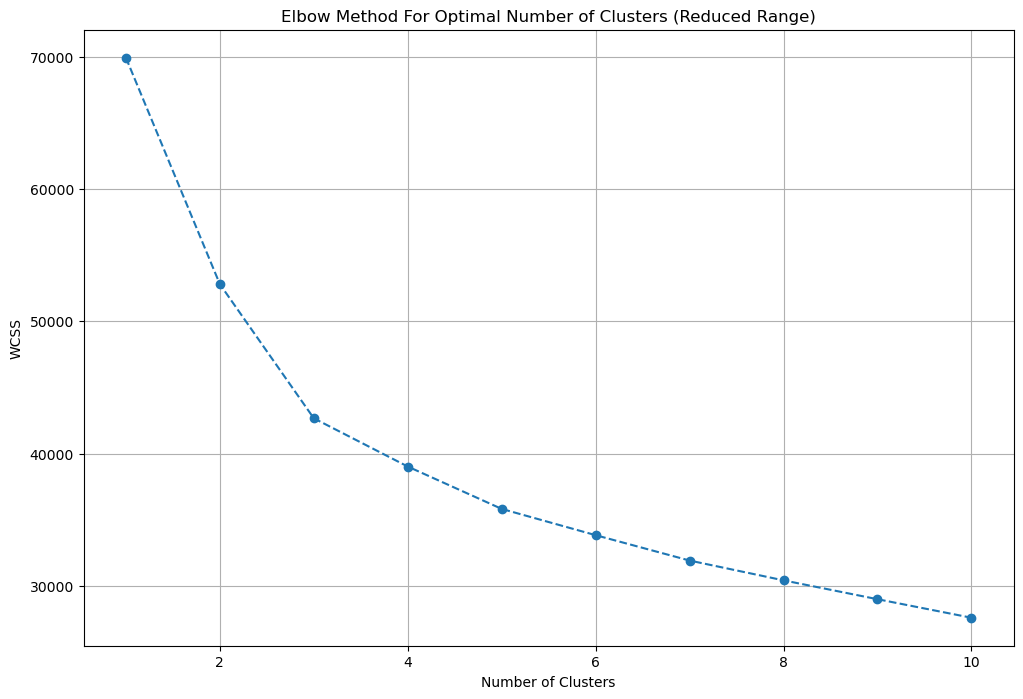

In [55]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [56]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\ameya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [57]:
df = df.iloc[:,:-18]


In [58]:
df['furnishing_type'] = cluster_assignments


In [59]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished


furnishDetails  \
3468                                                                                                                                                                                                                                                                   NaN   
526                                                                                                                                                                                                                                                                    NaN   
2787    ['4 Wardrobe', '4 Fan', '1 Exhaust Fan', '10 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']   
1166          ['5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '12 Light', '5 AC', '1 Chimney', '3 Curtains', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']   
2149  ['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']   

      furnishing_type  
3468                0  
526                 0  
2787                0  
1166                1  
2149                0

In [60]:
df[['society','features']].sample(5)


society  \
2207  indiabulls centrum park3.7 ?   
738                    independent   
114                 unitech vistas   
270          vatika sovereign park   
3557              smart world gems   

                                                                                                                                                                                                                                                                                                                                                                                          features  
2207                                                                                                                                                                                                                                                                                                     ['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park']  
738                                                                                                                                                                                                                                                                                                                                                                                            NaN  
114                                                                                                                                                                                                                                                                                                                                   ['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM']  
270   ['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']  
3557                                                                                                                                                                                                                                                                                                                                                                                           NaN

In [61]:
df['features'].isnull().sum()


711

In [64]:
import pandas as pd
app_df = pd.read_csv('appartments.csv',encoding='latin1')
app_df.head(2)

PropertyName                               PropertySubName  \
0  Smartworld One DXP  2, 3, 4 BHK Apartment in Sector 113, Gurgaon   
1           M3M Crown     3, 4 BHK Apartment in Sector 111, Gurgaon   

                                                                                                                                  NearbyLocations  \
0                                           ['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']   
1  ['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    LocationAdvantages  \
0         {'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}   
1  {'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}   

                                                                          Link  \
0  https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415   
1           https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068   

                                                                                                                                                                                                                                                                                                                                                                                           PriceDetails  \
0  {'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '? 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '? 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '? 3.24 - 4.56 Cr'}}   
1                                                                                                       {'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '? 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '? 3.08 - 3.73 Cr'}}   

                                                                                                                                   TopFacilities  \
0                     ['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']   
1  ['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']   

In [65]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()
temp_df = df[df['features'].isnull()]

In [66]:
temp_df.shape


(711, 26)

In [67]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']


In [69]:
df['features'].isnull().sum()


711

In [71]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [72]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [73]:
features_binary_df.sample(5)


Airy Rooms  Bank Attached Property  Centrally Air Conditioned  \
2664           0                       0                          0   
2231           1                       0                          0   
3842           0                       0                          0   
751            0                       0                          0   
2085           0                       0                          0   

      Club house / Community Center  False Ceiling Lighting  \
2664                              0                       0   
2231                              0                       1   
3842                              0                       1   
751                               1                       0   
2085                              0                       0   

      Feng Shui / Vaastu Compliant  Fitness Centre / GYM  High Ceiling Height  \
2664                             0                     0                    0   
2231                             1                     1                    1   
3842                             1                     0                    1   
751                              0                     1                    0   
2085                             0                     0                    0   

      Intercom Facility  Internet/wi-fi connectivity  Lift(s)  \
2664                  0                            0        0   
2231                  0                            1        0   
3842                  0                            1        0   
751                   1                            0        1   
2085                  0                            0        0   

      Low Density Society  Maintenance Staff  Natural Light  \
2664                    0                  0              0   
2231                    0                  1              1   
3842                    0                  0              0   
751                     0                  1              0   
2085                    0                  0              0   

      No open drainage around  Park  Piped-gas  Power Back-up  \
2664                        0     0          0              0   
2231                        0     0          0              0   
3842                        0     1          0              0   
751                         0     1          0              0   
2085                        0     0          0              0   

      Private Garden / Terrace  Rain Water Harvesting  Recently Renovated  \
2664                         0                      0                   0   
2231                         1                      1                   0   
3842                         1                      1                   0   
751                          0                      1                   0   
2085                         0                      0                   0   

      Security / Fire Alarm  Security Personnel  \
2664                      0                   0   
2231                      0                   1   
3842                      1                   0   
751                       0                   1   
2085                      0                   0   

      Separate entry for servant room  Shopping Centre  Spacious Interiors  \
2664                                0                0                   0   
2231                                0                0                   1   
3842                                0                0                   0   
751                                 0                1                   0   
2085                                0                0                   0   

      Swimming Pool  Visitor Parking  Waste Disposal  Water Storage  \
2664              0                0               0              0   
2231              0                1               1              1   
3842              0                1               1              1   
751               1          

In [74]:
features_binary_df.shape


(3886, 32)

In [75]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\ameya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ameya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ameya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ameya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

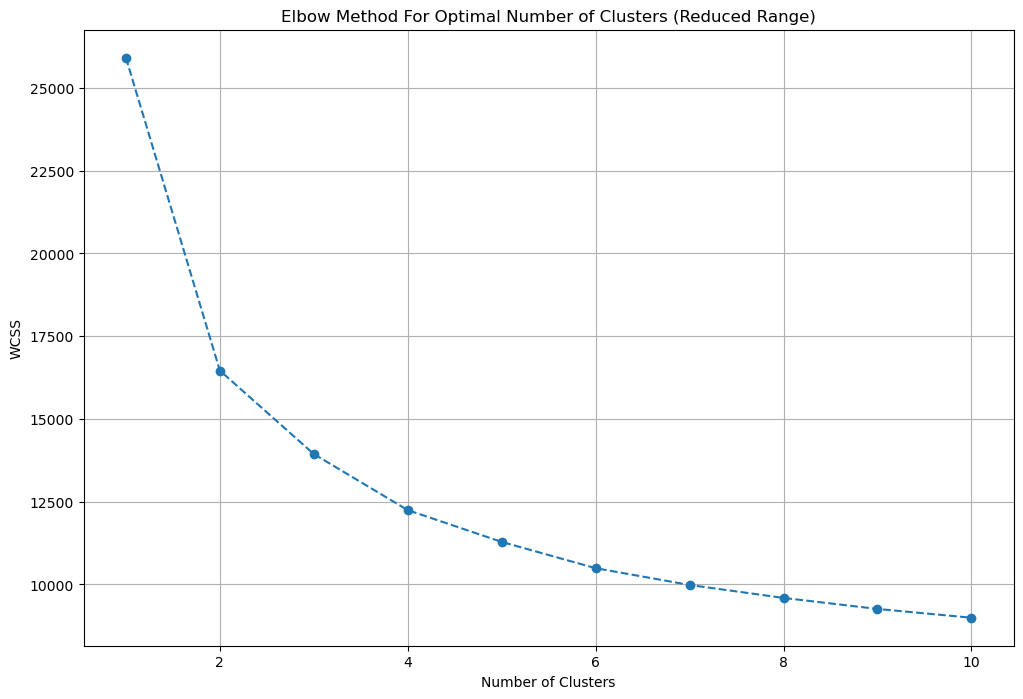

In [76]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [78]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Verify and print column names
print("Columns in weights dictionary:")
print(list(weights.keys()))

print("Columns in features_binary_df DataFrame:")
print(features_binary_df.columns.tolist())

# Identify missing columns
missing_columns = [col for col in weights.keys() if col not in features_binary_df.columns]
print("Missing columns:", missing_columns)

# Adjust weights dictionary to match available columns in DataFrame
adjusted_weights = {k: v for k, v in weights.items() if k in features_binary_df.columns}

# Final calculation using adjusted weights
common_columns = [col for col in adjusted_weights.keys()]
luxury_score = features_binary_df[common_columns].multiply([adjusted_weights[col] for col in common_columns], axis=1).sum(axis=1)

print(luxury_score)
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

Columns in weights dictionary:
['24/7 Power Backup', '24/7 Water Supply', '24x7 Security', 'ATM', 'Aerobics Centre', 'Airy Rooms', 'Amphitheatre', 'Badminton Court', 'Banquet Hall', 'Bar/Chill-Out Lounge', 'Barbecue', 'Basketball Court', 'Billiards', 'Bowling Alley', 'Business Lounge', 'CCTV Camera Security', 'Cafeteria', 'Car Parking', 'Card Room', 'Centrally Air Conditioned', 'Changing Area', "Children's Play Area", 'Cigar Lounge', 'Clinic', 'Club House', 'Concierge Service', 'Conference room', 'Creche/Day care', 'Cricket Pitch', 'Doctor on Call', 'Earthquake Resistant', 'Entrance Lobby', 'False Ceiling Lighting', 'Feng Shui / Vaastu Compliant', 'Fire Fighting Systems', 'Fitness Centre / GYM', 'Flower Garden', 'Food Court', 'Foosball', 'Football', 'Fountain', 'Gated Community', 'Golf Course', 'Grocery Shop', 'Gymnasium', 'High Ceiling Height', 'High Speed Elevators', 'Infinity Pool', 'Intercom Facility', 'Internal Street Lights', 'Internet/wi-fi connectivity', 'Jacuzzi', 'Jogging Tra

KeyError: '[\'24/7 Power Backup\', \'24/7 Water Supply\', \'24x7 Security\', \'ATM\', \'Aerobics Centre\', \'Amphitheatre\', \'Badminton Court\', \'Banquet Hall\', \'Bar/Chill-Out Lounge\', \'Barbecue\', \'Basketball Court\', \'Billiards\', \'Bowling Alley\', \'Business Lounge\', \'CCTV Camera Security\', \'Cafeteria\', \'Car Parking\', \'Card Room\', \'Changing Area\', "Children\'s Play Area", \'Cigar Lounge\', \'Clinic\', \'Club House\', \'Concierge Service\', \'Conference room\', \'Creche/Day care\', \'Cricket Pitch\', \'Doctor on Call\', \'Earthquake Resistant\', \'Entrance Lobby\', \'Fire Fighting Systems\', \'Flower Garden\', \'Food Court\', \'Foosball\', \'Football\', \'Fountain\', \'Gated Community\', \'Golf Course\', \'Grocery Shop\', \'Gymnasium\', \'High Speed Elevators\', \'Infinity Pool\', \'Internal Street Lights\', \'Jacuzzi\', \'Jogging Track\', \'Landscape Garden\', \'Laundry\', \'Lawn Tennis Court\', \'Library\', \'Lounge\', \'Manicured Garden\', \'Medical Centre\', \'Milk Booth\', \'Mini Theatre\', \'Multipurpose Court\', \'Multipurpose Hall\', \'Natural Pond\', \'Party Lawn\', \'Piped Gas\', \'Pool Table\', \'Power Back up Lift\', \'Property Staff\', \'RO System\', \'Reading Lounge\', \'Restaurant\', \'Salon\', \'Sauna\', \'Sewage Treatment Plant\', \'Skating Rink\', \'Solar Lighting\', \'Solar Water Heating\', \'Spa\', \'Squash Court\', \'Steam Room\', \'Sun Deck\', \'Temple\', \'Theatre\', \'Toddler Pool\', \'Valet Parking\', \'Video Door Security\', \'Water Softener Plant\', \'Yoga/Meditation Area\'] not in index'

In [79]:
df['luxury_score'] = luxury_score


In [80]:
df.head()


property_type                society      sector       price  \
0          flat    dlf the ultima4.0 ?   sector 81   2.3 Crore   
1          flat    smart world orchard   sector 61  1.47 Crore   
2          flat  pivotal riddhi siddhi   sector 99      72 Lac   
3          flat     godrej summit3.7 ?  sector 104  1.75 Crore   
4         house            independent   sector 12         2.9   

   price_per_sqft                            areaWithType     bedRoom  \
0         10994.0  Super Built up area 2092(194.35 sq.m.)         3.0   
1         12250.0        Carpet area: 1200 (111.48 sq.m.)         2.0   
2           947.0                        Carpet area: 706         2.0   
3          7530.0        Carpet area: 2324 (215.91 sq.m.)         4.0   
4         10740.0            Plot area 2700(250.84 sq.m.)  7 Bedrooms   

   bathroom balcony additionalRoom  floorNum      facing   agePossession  \
0       4.0     NaN   servant room       6.0        East    New Property   
1       2.0     2.0     study room       2.0         NaN       Undefined   
2       2.0     2.0     store room      12.0         NaN  Relatively New   
3       5.0     NaN   servant room       1.0         NaN    New Property   
4       7.0       3  not available       2.0  South-West    Old Property   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            nearbyLocations  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ['Huda Metro Station (Gurugram)', 'Vatika Town Square-INXT', 'Manesar Road', 'NH 48', 'Euro International School, Sec 84', 'SGT University', 'Miracles Apollo Cradle Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']   
1                                                                                      

In [81]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [82]:
df.sample(5)

property_type                        society      sector       price  \
3430          flat                    essel tower   sector 28   2.2 Crore   
1623          flat     signature global park4.0 ?  sohna road    90.5 Lac   
548          house                    independent  sohna road        1.55   
3766          flat        la vida by tata housing  sector 113  1.65 Crore   
1694          flat  alpha corp gurgaonone 844.0 ?   sector 84  2.24 Crore   

      price_per_sqft  \
3430         12500.0   
1623          6289.0   
548          14720.0   
3766         10449.0   
1694          6523.0   

                                                                                                                areaWithType  \
3430                                                                                        Carpet area: 1760 (163.51 sq.m.)   
1623                                                                                        Carpet area: 1439 (133.69 sq.m.)   
548                                                                                               Plot area 117(97.83 sq.m.)   
3766  Super Built up area 1579(146.69 sq.m.)Built Up area: 1420 sq.ft. (131.92 sq.m.)Carpet area: 1220 sq.ft. (113.34 sq.m.)   
1694                                           Super Built up area 3434(319.03 sq.m.)Carpet area: 2900 sq.ft. (269.42 sq.m.)   

         bedRoom  bathroom balcony  floorNum      facing   agePossession  \
3430         3.0       4.0     NaN       3.0         NaN  Moderately Old   
1623         3.0       3.0     3.0       1.0        West  Relatively New   
548   2 Bedrooms       3.0       2       1.0       North    New Property   
3766         3.0       2.0     2.0       3.0  North-East  Relatively New   
1694         4.0       4.0     3.0      12.0        West  Relatively New   

        area super_built_up_area built_up_area carpet_area  study room  \
3430     NaN                None          None        None           0   
1623     NaN                None          None        None           0   
548   1053.0                None        1053.0        None           1   
3766     NaN                None          None        None           0   
1694     NaN                None          None        None           0   

      servant room  store room  pooja room  others  furnishing_type  \
3430             1           0           0       0                2   
1623             0           0           1       0                0   
548              0           0           1       0                1   
3766             0           0           0       0                0   
1694             1           0           0       0                0   

      luxury_score  
3430             0  
1623           165  
548             49  
3766            49  
1694            20

In [83]:
df.shape

(3886, 23)

In [ ]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)